In [9]:
from utils import *
check_tensorflow_gpu()

... Checking Tensorflow Version ...
Tensorflow built with CUDA? True
TF: 2.10.0 | CUDA: 64_112 | cuDNN: 64_8
# GPU available: 1 (NVIDIA GeForce RTX 3080)


***

In [10]:
df, mnemonics, well_title, well_runs, wdata = load_data('log_data', 'UT_MNEM_v2.xlsx')

choose_well = 17

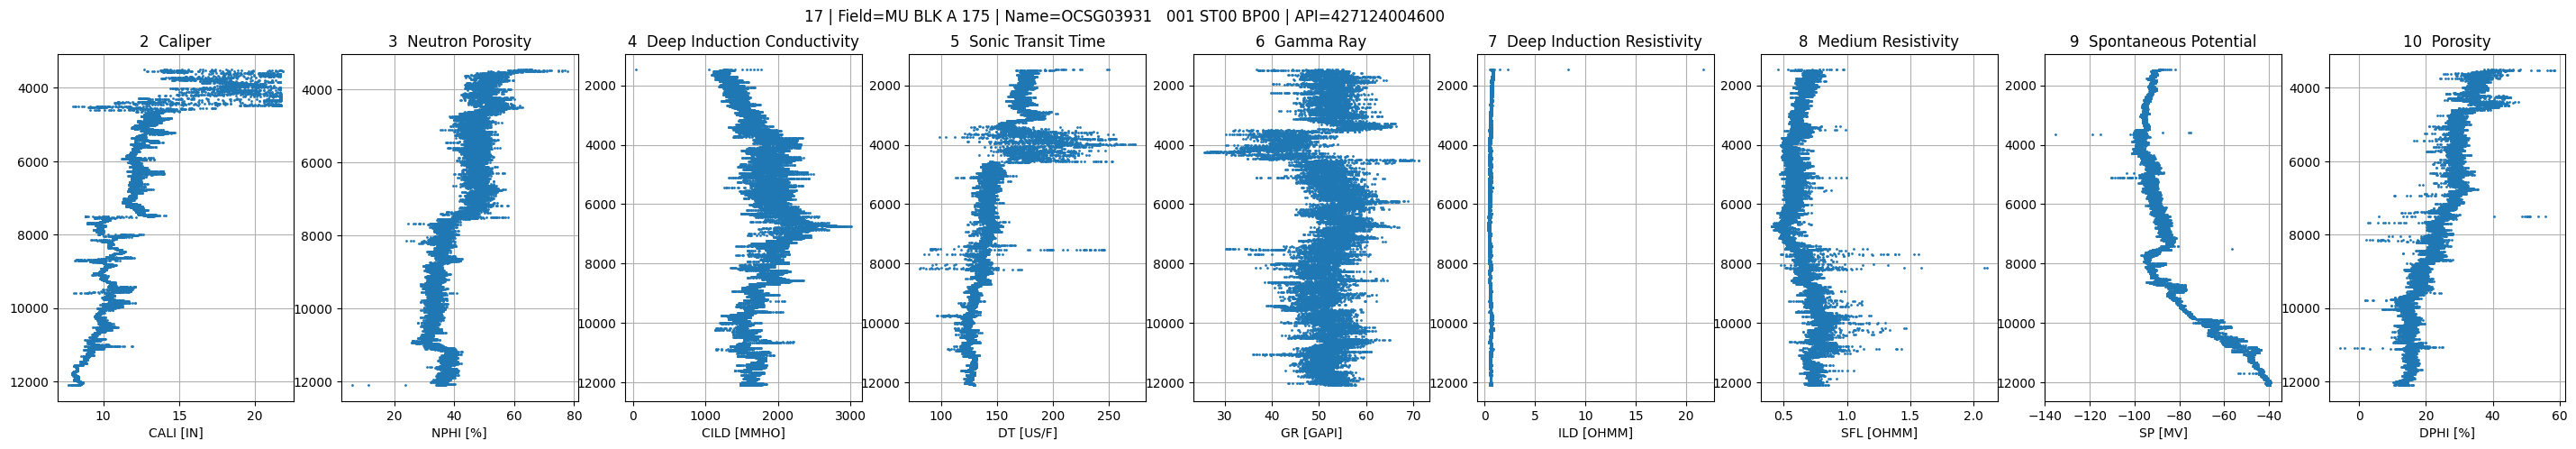

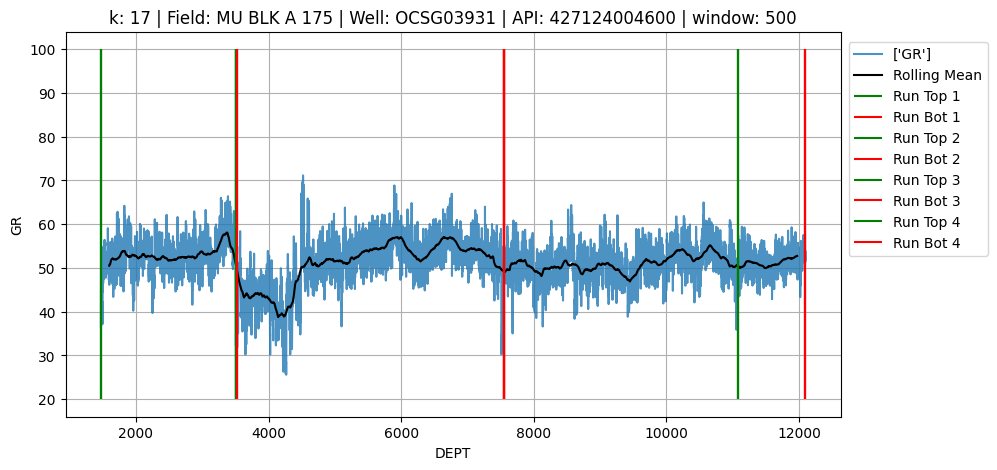

,DEPT,CALI,NPHI,CILD,DT,GR,ILD,SFL,SP,DPHI
0,1471.0,0.0,0.0,43.5076,207.1763,36.6747,21.6747,0.0000,-81.9652,0.0
1,1471.5,0.0,0.0,1051.4023,201.8521,40.2864,8.2761,0.0000,-83.7441,0.0
2,1472.0,0.0,0.0,1574.3125,202.4944,44.3405,2.3062,0.4555,-84.8408,0.0
3,1472.5,0.0,0.0,1619.4766,209.3799,47.1558,1.5124,0.5369,-85.6344,0.0
4,1473.0,0.0,0.0,1663.4160,210.9812,50.3577,1.0156,0.5923,-86.3281,0.0


In [11]:
plot_k_suites(df, mnemonics, k_start=choose_well, k_end=choose_well)
plot_well_and_runs(choose_well, df, well_runs)
wdata[choose_well].head()

Well #: 17


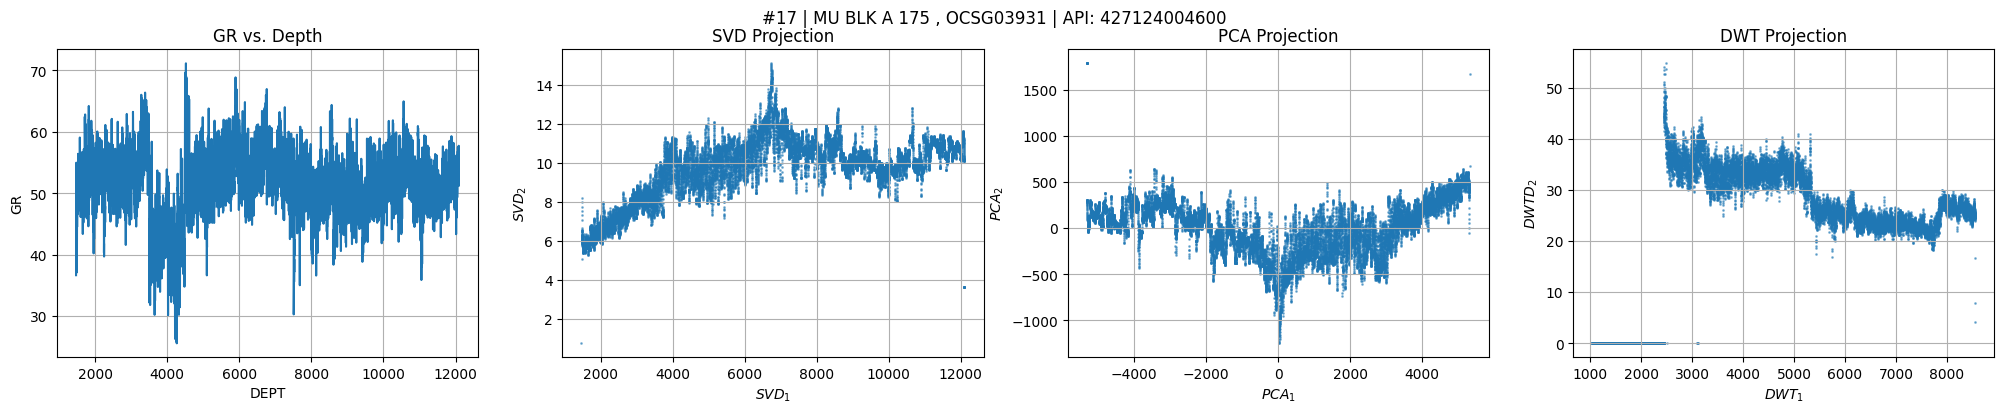

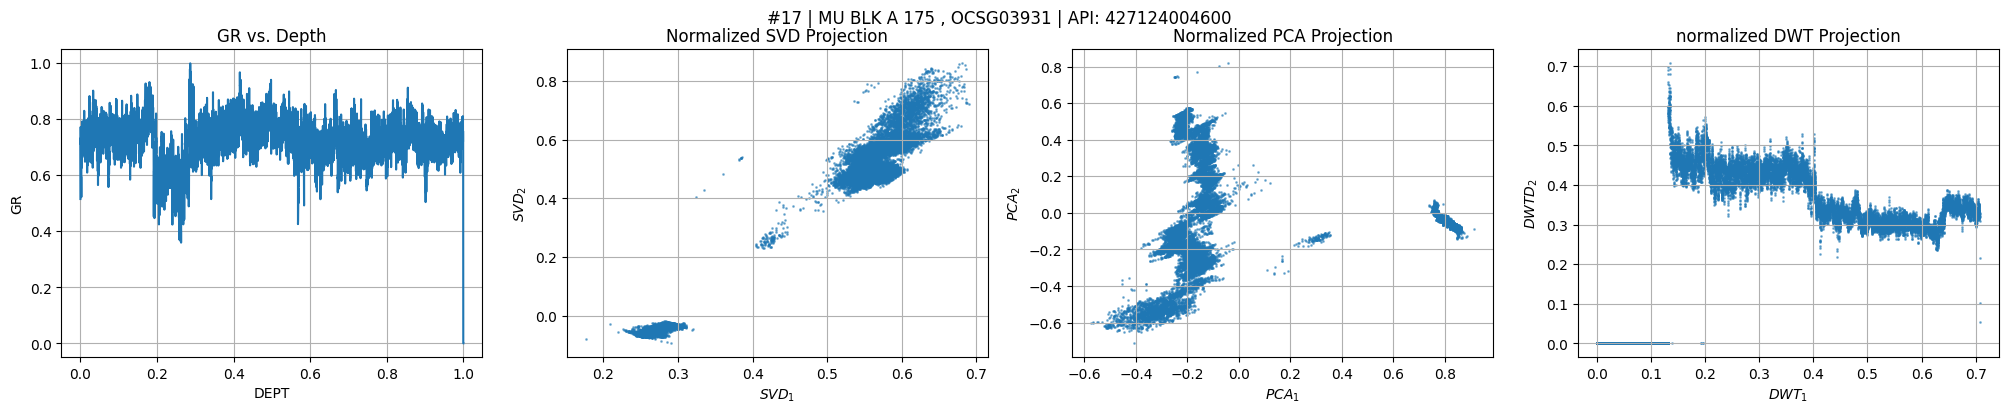

In [12]:
print('Well #: {}'.format(choose_well))

z_svd, z_pca, z_dwt = compute_latent_space(wdata, choose_well)
plot_latent_projections(df, choose_well, z_svd, z_pca, z_dwt)

### Repeat for normalized data
X_data, z_svd_n, z_pca_n, z_dwt_n = compute_latent_space(wdata, choose_well, normalize=True)
plot_normalized_latent_projections(df, choose_well, X_data, 'GR', z_svd_n, z_pca_n, z_dwt_n)

In [13]:
# choose_well = 17

# X_data = pd.DataFrame(MinMaxScaler().fit_transform(wdata[choose_well]), columns=wdata[choose_well].columns)
# tsne = TSNE(n_components=2, init='random', learning_rate='auto', n_jobs=6).fit_transform(X_data)
# spectral = SpectralEmbedding().fit_transform(X_data)
# lle = LocallyLinearEmbedding().fit_transform(X_data)

# plt.figure(figsize=(30,4))
# plt.suptitle(df[choose_well].well['FLD'].value + ', ' + df[choose_well].well['Well'].value.split()[0] + ' | API=' + df[choose_well].well['API'].value)

# plt.subplot(141)
# plt.plot(wdata[k]['DEPT'], wdata[k]['GR'])
# plt.xlabel('DEPT'); plt.ylabel('GR'); plt.grid()
# plt.title('GR Log')

# plt.subplot(142)
# plt.scatter(tsne[:,0], tsne[:,1], s=1, alpha=0.5)
# plt.xlabel('$tsne_1$'); plt.ylabel('$tsne_2$'); plt.grid()
# plt.title('t-SNE')

# plt.subplot(143)
# plt.scatter(spectral[:,0], spectral[:,1], alpha=0.5)
# plt.xlabel('$spectral_1$'); plt.ylabel('$spectral_2$'); plt.grid()
# plt.title('Spectral Embedding')

# plt.subplot(144)
# plt.scatter(lle[:,0], lle[:,1], alpha=0.5)
# plt.xlabel('$lle_1$'); plt.ylabel('$lle_2$'); plt.grid()
# plt.title('Locally Linear Embedding')

# plt.show()

In [14]:
choose_well = 28
nclust = len(well_runs[choose_well])-1

X_data = pd.DataFrame(MinMaxScaler().fit_transform(wdata[choose_well]), columns=wdata[choose_well].columns)
full_labels = DBSCAN().fit_predict(X_data)
GR_only_labels = KMeans(n_clusters=3).fit_predict(np.array(X_data['GR']).reshape(-1,1))

z0 = PCA(n_components=2).fit_transform(X_data)
z_labels = AgglomerativeClustering(n_clusters=nclust).fit_predict(z0)

m0 = TSNE(n_components=2, init='random', learning_rate='auto', n_jobs=6).fit_transform(X_data)
m_labels = AgglomerativeClustering(n_clusters=nclust).fit_predict(m0)

c:\Users\Misael Morales\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


API 427124011300


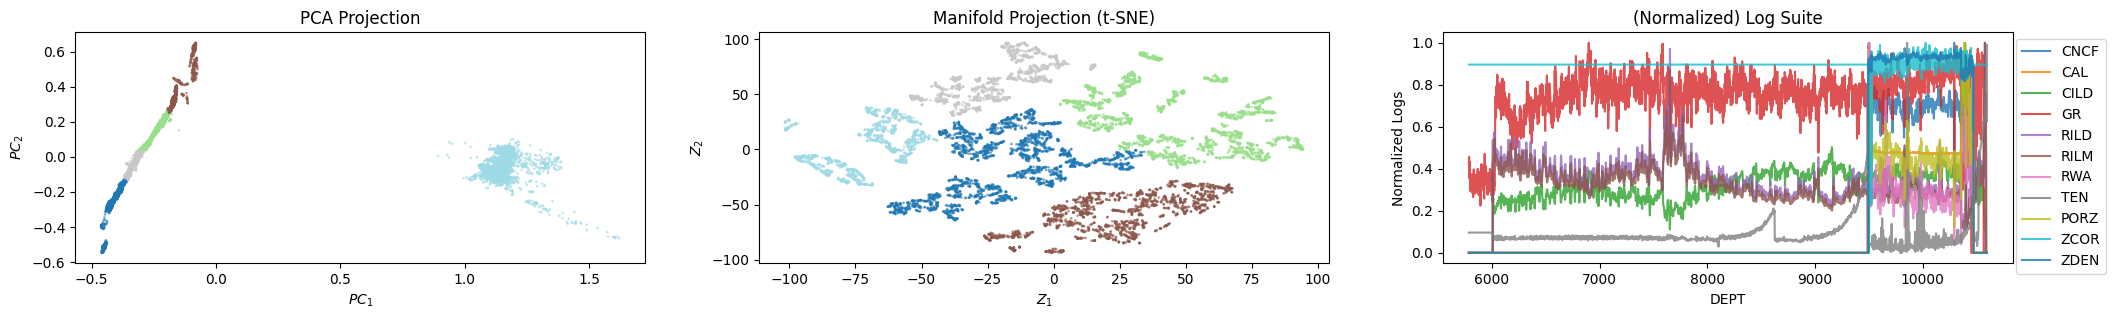

In [15]:
print('API', df[choose_well].header['Well']['API'].value)

plt.figure(figsize=(25,3))

plt.subplot(131)
plt.scatter(z0[:,0], z0[:,1], s=1, c=z_labels, alpha=0.5, cmap='tab20')
plt.xlabel('$PC_1$'); plt.ylabel('$PC_2$'); plt.title('PCA Projection')

plt.subplot(132)
plt.scatter(m0[:,0], m0[:,1], s=1, c=m_labels, alpha=0.5, cmap='tab20')
plt.xlabel('$Z_1$'); plt.ylabel('$Z_2$'); plt.title('Manifold Projection (t-SNE)')

plt.subplot(133)
plt.plot(wdata[choose_well]['DEPT'], X_data.iloc[:,1:], alpha=0.8)
plt.xlabel('DEPT'); plt.ylabel('Normalized Logs'); plt.title('(Normalized) Log Suite')
plt.legend(X_data.iloc[:,1:], loc='upper center', ncol=1, bbox_to_anchor=(1.085,1))

plt.show()

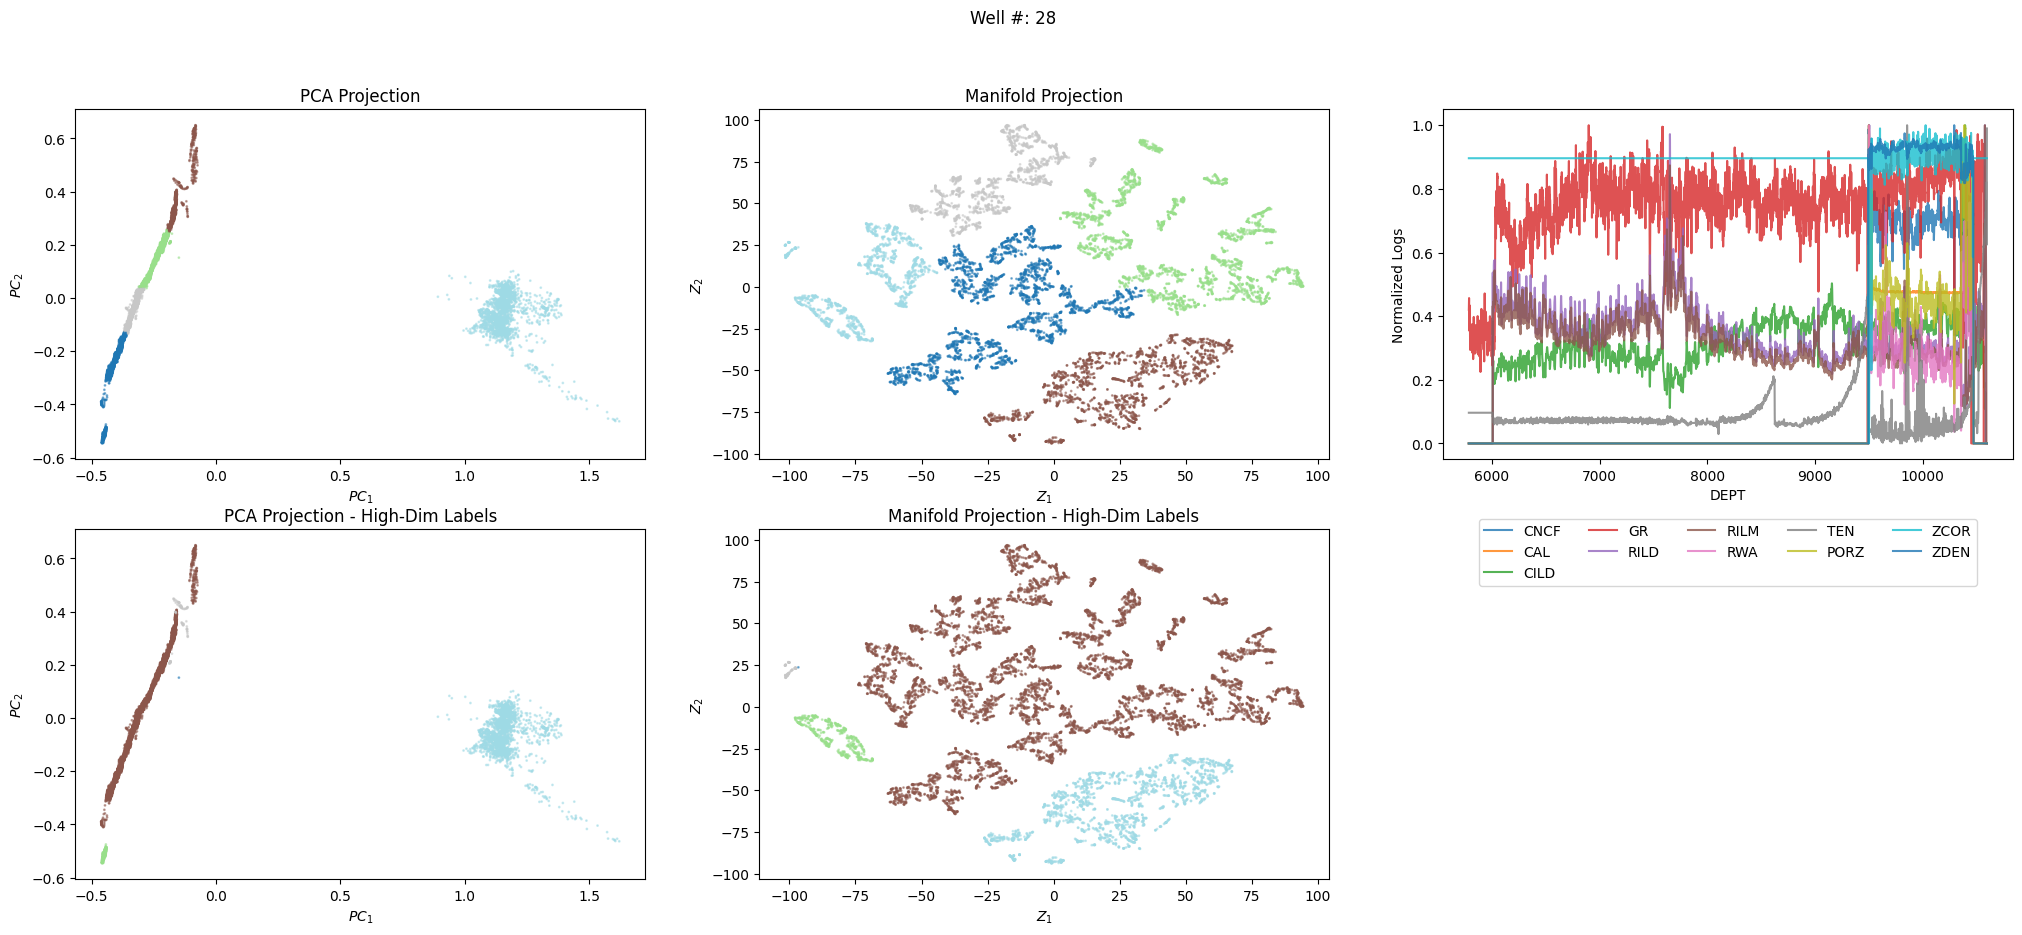

In [16]:
##### PLOTS #####
plt.figure(figsize=(25,10))
plt.suptitle('Well #: {}'.format(choose_well))

plt.subplot(231)
plt.scatter(z0[:,0], z0[:,1], s=1, c=z_labels, alpha=0.5, cmap='tab20')
plt.xlabel('$PC_1$'); plt.ylabel('$PC_2$'); plt.title('PCA Projection')

plt.subplot(232)
plt.scatter(m0[:,0], m0[:,1], s=1, c=m_labels, alpha=0.5, cmap='tab20')
plt.xlabel('$Z_1$'); plt.ylabel('$Z_2$'); plt.title('Manifold Projection')

plt.subplot(233)
plt.plot(wdata[choose_well]['DEPT'], X_data.iloc[:,1:], alpha=0.8)
plt.xlabel('DEPT'); plt.ylabel('Normalized Logs')
plt.legend(X_data.iloc[:,1:], loc='upper center', ncol=5, bbox_to_anchor=(0.5,-0.15))

plt.subplot(234)
plt.scatter(z0[:,0], z0[:,1], s=1, c=full_labels, alpha=0.5, cmap='tab20')
plt.xlabel('$PC_1$'); plt.ylabel('$PC_2$'); plt.title('PCA Projection - High-Dim Labels')

plt.subplot(235)
plt.scatter(m0[:,0], m0[:,1], s=1, c=full_labels, alpha=0.5, cmap='tab20')
plt.xlabel('$Z_1$'); plt.ylabel('$Z_2$'); plt.title('Manifold Projection - High-Dim Labels')

plt.show()

NameError: name 'well_mnem' is not defined

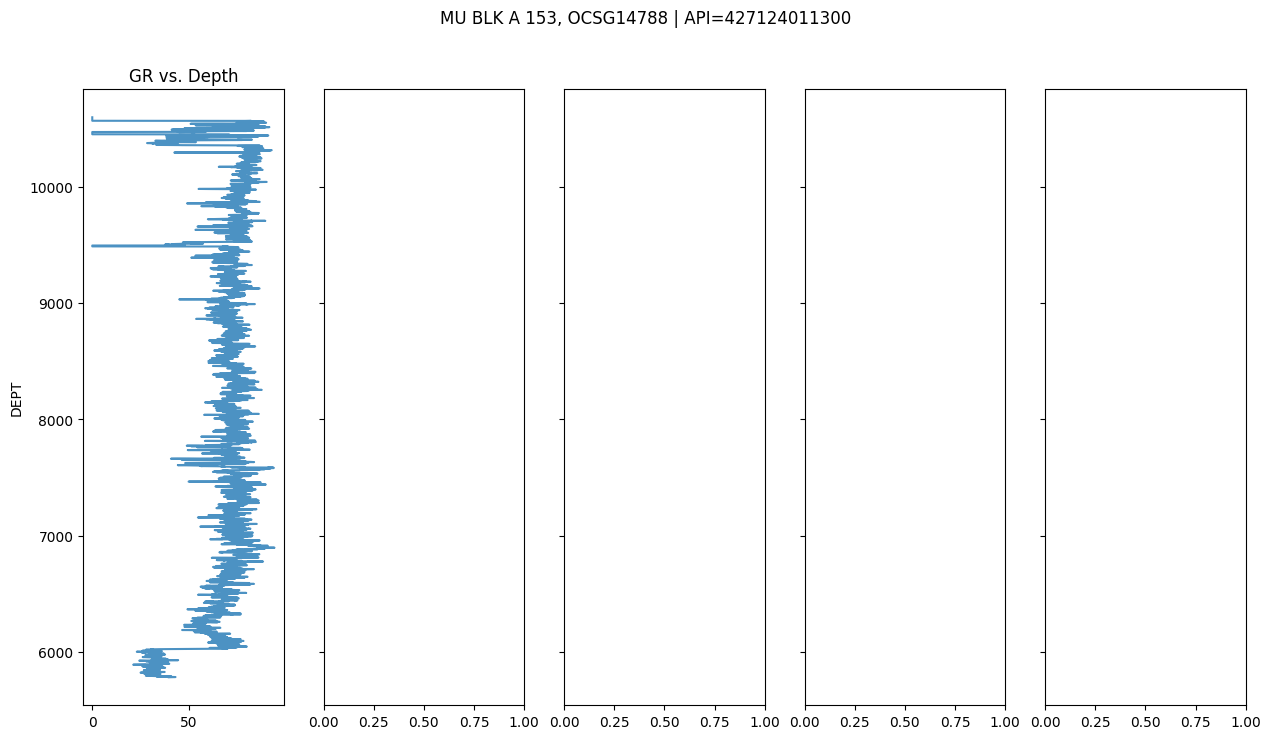

In [17]:
titles = ['GR-only Clusters','High-Dim Clusters','PCA Clusters','Manifold Clusters']
labels = [GR_only_labels, full_labels, z_labels, m_labels]

fig, axs = plt.subplots(1, 5, figsize=(15,8), sharey=True)
plt.suptitle(df[choose_well].well['FLD'].value + ', ' + df[choose_well].well['Well'].value.split()[0] + ' | API=' + df[choose_well].well['API'].value)

axs[0].plot(wdata[choose_well]['GR'], wdata[choose_well]['DEPT'], alpha=0.8)
axs[0].set(ylabel='DEPT', title='GR vs. Depth')
axs[0].hlines(well_mnem[choose_well]['TOPL_Fix'], wdata[choose_well]['GR'].min(), np.ceil(wdata[choose_well]['GR'].max()), colors='g')
axs[0].hlines(well_mnem[choose_well]['BOTL_Fix'], wdata[choose_well]['GR'].min(), np.ceil(wdata[choose_well]['GR'].max()), colors='r')
for i in range(5):
    axs[i].set(xlabel='GR')
    axs[i].grid()
for k in range(4):
    axs[k+1].scatter(wdata[choose_well]['GR'], wdata[choose_well]['DEPT'], alpha=0.8, c=labels[k], s=1)
    axs[k+1].set(title=titles[k])
plt.gca().invert_yaxis()
plt.show()

# END